In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [4]:
data = pd.read_csv('/content/drive/MyDrive/dataset/fetal_health.csv')

In [5]:
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [6]:
data['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [11]:
data.rename(columns = {'fetal_health' : 'target'}, inplace = True)

In [12]:
data.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'target'],
      dtype='object')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [15]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


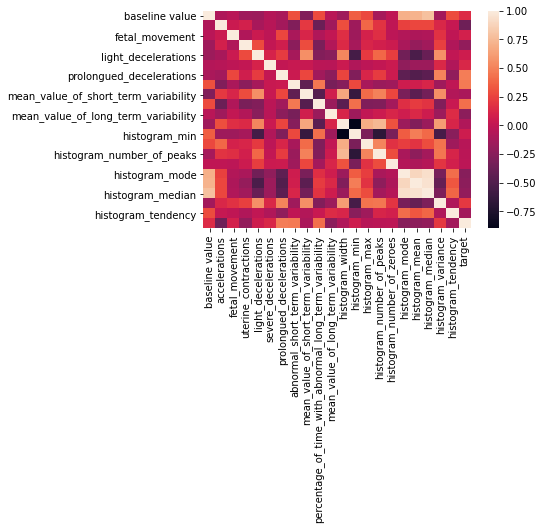

In [16]:
sns.heatmap(data.corr())

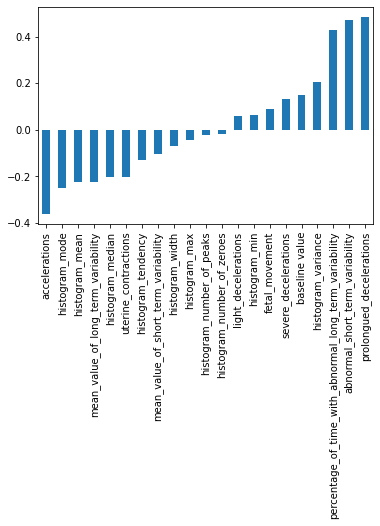

In [18]:
data.corr()['target'].sort_values(ascending = True).drop('target', inplace = False).plot(kind = 'bar')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


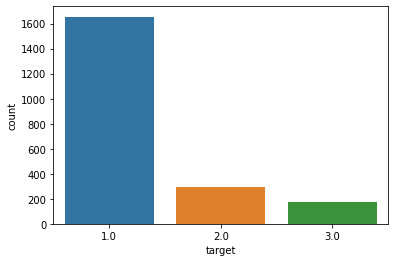

In [19]:
sns.countplot('target', data = data)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
X = data.drop('target', inplace = False, axis= 1)
y = data['target']

In [23]:
y.shape

(2126,)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
scaler = MinMaxScaler()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [63]:
model = Sequential()

model.add(Dense (32, activation= 'relu'))
model.add(Dense (128, activation= 'relu'))
model.add(Dense (512, activation= 'relu'))
model.add(Dense (256, activation= 'relu'))
model.add(Dense (64, activation= 'relu'))
model.add(Dense (4, activation= 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy' )

In [69]:
model.fit(X_train, y_train, verbose = 1, epochs = 25, validation_data=(X_test, y_test))

Epoch 1/25
47/47 [==============================] - 0s 6ms/step - loss: 0.1568 - val_loss: 0.2094
Epoch 2/25
47/47 [==============================] - 0s 5ms/step - loss: 0.1578 - val_loss: 0.2245
Epoch 3/25
47/47 [==============================] - 0s 5ms/step - loss: 0.1585 - val_loss: 0.1960
Epoch 4/25
47/47 [==============================] - 0s 5ms/step - loss: 0.1446 - val_loss: 0.2230
Epoch 5/25
47/47 [==============================] - 0s 5ms/step - loss: 0.1484 - val_loss: 0.1991
Epoch 6/25
47/47 [==============================] - 0s 5ms/step - loss: 0.1382 - val_loss: 0.2247
Epoch 7/25
47/47 [==============================] - 0s 5ms/step - loss: 0.1337 - val_loss: 0.2165
Epoch 8/25
47/47 [==============================] - 0s 5ms/step - loss: 0.1475 - val_loss: 0.2380
Epoch 9/25
47/47 [==============================] - 0s 5ms/step - loss: 0.1282 - val_loss: 0.2175
Epoch 10/25
47/47 [==============================] - 0s 5ms/step - loss: 0.1208 - val_loss: 0.2571
Epoch 11/25
47/47 [

In [65]:
losses = pd.DataFrame(model.history.history)

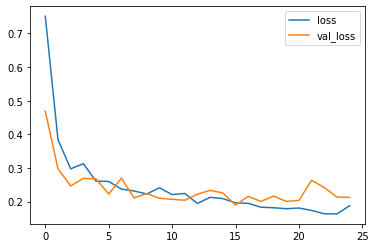

In [66]:
losses.plot()

In [67]:
pred_1 =model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [68]:
print(classification_report(y_test, pred_1))

              precision    recall  f1-score   support

         1.0       0.93      0.99      0.96       501
         2.0       0.75      0.57      0.65        86
         3.0       0.98      0.80      0.88        51

    accuracy                           0.92       638
   macro avg       0.89      0.79      0.83       638
weighted avg       0.91      0.92      0.91       638



In [55]:
model.save('First_health_2.h5')

In [70]:
better_model = load_model('First_health_2.h5')

In [71]:
new_pred = better_model.predict(X_test)